In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
%matplotlib inline
import nplab.datafile as df
import scipy.signal as sig
import scipy.constants as const
import peakutils
import numpy as np
import datetime
from peakutils.plot import plot as pplot
from parula import cm_data
from matplotlib.colors import LinearSegmentedColormap 
from matplotlib.collections import LineCollection
import os
import Alexsdatafuncs
import matplotlib.cm as cm
import time
import scipy.integrate as integrate
import scipy.special as special

In [2]:
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
copper_map = LinearSegmentedColormap.from_list('copper', cm_data)
colours_1 = cm.viridis(np.linspace(0,1,500))
colours_2 = cm.hot(np.linspace(0,1,500))
Alex_data = Alexsdatafuncs.data_manipulators()
Alex_plot = Alexsdatafuncs.plotting_funcs()

In [1]:
data_f.close()

NameError: name 'data_f' is not defined

In [7]:
data_f = df.open_file(set_current = False)
fname = data_f.filename

C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/MAPbI3 perovskite nanoplatelets/2019-03-15_continued from 0314.h5


In [8]:
opt_meas_1 = data_f['OceanOpticsSpectrometer']

In [334]:
#Sort and filter all data according to their timestamp and restrict wavelength range

start_time_tot = datetime.datetime.strptime('2019-03-15T14:48:06.795000', 
                                        "%Y-%m-%dT%H:%M:%S.%f")
finish_time_tot = datetime.datetime.strptime('2019-03-15T18:19:00.004000', 
                                        "%Y-%m-%dT%H:%M:%S.%f")

df_ref = opt_meas_1.values()[0].attrs['reference']
df_bgd = opt_meas_1.values()[0].attrs['background']
wl = opt_meas_1.values()[0].attrs['wavelengths']

#Create array to hold data with corresponding time value
all_data_w_time = []
all_data_w_time_n = []

#Iterate through data set and make array with data in one column and timestamp in the other
for data_set in opt_meas_1.values():
    
    t = datetime.datetime.strptime(
                        data_set.attrs['creation_timestamp'][:19], "%Y-%m-%dT%H:%M:%S")
    
    n = data_set.name[25:]
    
                     
    data = (data_set.value - df_bgd)/(df_ref-df_bgd)
    
    if t >= start_time_tot and t <= finish_time_tot: #Make sure you choose the right start and finish time

        s = (t-datetime.datetime(1970,1,1)).total_seconds()

        data_w_time = np.append(data, s)
        all_data_w_time.append(data_w_time)
    
#Sort all the data vs timestamp   
all_data_w_time_sorted = sorted(all_data_w_time,key=lambda x: x[-1])
all_data = np.delete(all_data_w_time_sorted, -1,1) #Delete the timestamp column of data

#Filter the data to help define peaks
all_data_filtered = []
for i in range(0, len(all_data)):
    filt_data = sig.savgol_filter(all_data[i],23,3)
    all_data_filtered.append(filt_data)

In [416]:

start_wl = 510; #Wavelength to normalise from
fin_wl = 950
start_ind = (np.abs(wl - start_wl)).argmin()
fin_ind = (np.abs(wl - fin_wl)).argmin()
norm_data = []

#PLonAu = all_data[217:322]
#PLonAu = all_data[332:384] # NP1
#PLonAu = all_data[386:597] # NP2
#PLonAu = all_data[602:754] # NP4 power changes
PLonAu = all_data[754:850] #NP4 switching
#PLonAu = all_data[850:949] #NP5 power changes
#PLonAu = PLonAu[[85,88,90,92,94, 95]]
#PLonAu = all_data[964:1029] #NP5 swtiching
#PLonAu = all_data[1053:1168] #NP5 power changes

#for i in range(len(PLonAu)):
#    PLonAu[i] = PLonAu[i]*(df_ref-df_bgd)

PLonAu_cr = []
for i in range(len(PLonAu)):
    PLonAu_i = PLonAu[i][start_ind:fin_ind]
    PLonAu_cr.append(PLonAu_i)
    
PLonAu_norm = []
for i in range(len(PLonAu)):
    inf_norm = np.linalg.norm(PLonAu_cr[i], axis=0, ord = np.inf)
    PLonAu_norm.append(PLonAu_cr[i]/inf_norm)
    

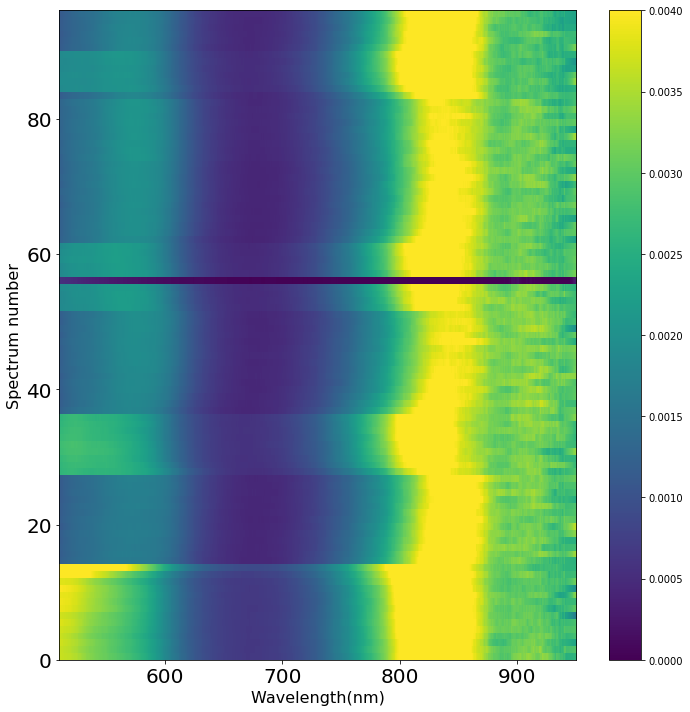

In [421]:
fig1 = plt.figure(1, figsize = (10, 10))
ax1 = fig1.add_subplot(111)

#all_sorted_array = np.array(sorted_array, dtype=float)

PLonAu_cr_sm = []
for i in range(0, len(PLonAu_cr)):
    filt_data = sig.savgol_filter(PLonAu_cr[i],23,1)
    PLonAu_cr_sm.append(filt_data)  
    
#PLonAu_cr_sm = np.delete(PLonAu_cr_sm, 65, axis = 0)
#PLonAu_cr_sm = np.delete(PLonAu_cr_sm, 65, axis = 0)
#PLonAu_cr_sm = np.delete(PLonAu_cr_sm, 66, axis = 0)
#PLonAu_cr_sm = np.delete(PLonAu_cr_sm, 67, axis = 0)
#PLonAu_cr_sm = np.delete(PLonAu_cr_sm, 68, axis = 0)
#PLonAu_cr_sm = np.delete(PLonAu_cr_sm, 69, axis = 0)
#PLonAu_cr_sm = np.delete(PLonAu_cr_sm, 79, axis = 0)
#PLonAu_cr_sm = np.delete(PLonAu_cr_sm, 81, axis = 0)
#PLonAu_cr_sm = np.delete(PLonAu_cr_sm, 82, axis = 0)
#PLonAu_cr_sm = np.delete(PLonAu_cr_sm, 83, axis = 0)
#PLonAu_cr_sm = np.delete(PLonAu_cr_sm, 84, axis = 0)
#PLonAu_cr_sm = np.delete(PLonAu_cr_sm, 85, axis = 0)

mapfig1 = ax1.imshow(PLonAu_cr_sm[:-1][::-1], 
                    extent=[start_wl, fin_wl,
                    0, len(PLonAu_cr_sm)], aspect = 'auto', 
                            cmap = cm.viridis, vmin = [0.00,0.004])

fig1.colorbar(mapfig1)

ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlabel("Wavelength(nm)", fontsize = 16)
ax1.set_ylabel("Spectrum number", fontsize = 16)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/MAPbI3 perovskite nanoplatelets/2019-03-15/Map NP5 PL2.png', bbox_inches='tight')


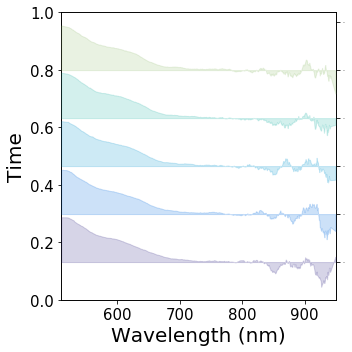

In [415]:
#Plot the raw data
#This factor defines the offset between each spectrum in the graph
mega_fact = 0.001
#This calls the function which adds the offset
data_os = Alex_plot.offset_spectra(PLonAu_cr_sm, mega_fact)
#pk_wls_1 = pk_wls_norm
#pk_ints_1 = pk_ints_norm
wls = wl[start_ind:fin_ind]

fig1 = plt.figure(1, figsize = (5,5))#0.2*len(data_os)))
ax1 = fig1.add_subplot(111)
ax1b = ax1.twinx()

colours = parula_map(np.linspace(0,0.8,len(data_os)))
for i in range(0, len(data_os)-1):
    lwidths = (data_os[i] - i*mega_fact)*2
    points = np.array([wls , data_os[i]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis = 1)
    lc_2 = LineCollection(segments, linewidths = lwidths, color = colours[i])
    ax1b.add_collection(lc_2)
    spec1 = np.array(data_os[i], dtype = float)
#     spec2 = np.array(len(all_data_w_time_sorted_offset_n[i])*[i], dtype = float)
    spec2 = np.ones(len(wls))*i*mega_fact
    ax1b.fill_between(wls, spec1, spec2, color = colours[i], 
                alpha = 0.2, zorder = 3)
    #Add in scatter spectra with peak wavelengths
    #ax1b.scatter(pk_wls_1[i], pk_ints_1[i] + i*mega_fact, color = "black", marker = "+" )

    
#ax1.axhline(1, 405, 1000, color = 'r', linewidth = 10)
ax1.set_xlim(start_wl, fin_wl)
ax1.set_xlabel("Wavelength (nm)", fontsize = 20)
ax1.set_ylabel("Time", fontsize = 20)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.set_ylim(0,1)
#ax1b.set_ylim(0, (i+3))#*mega_facT)
ax1b.tick_params(axis='y', labelsize=0)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/MAPbI3 perovskite nanoplatelets/2019-03-15/Plot_NP6_PL2.png', bbox_inches='tight')


Text(0,0.5,u'Spectrum number')

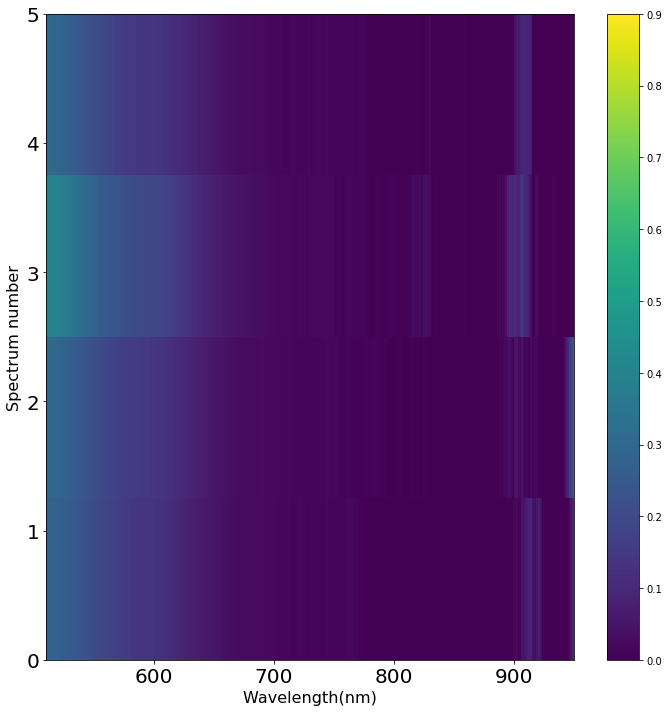

In [391]:
fig1 = plt.figure(1, figsize = (10, 10))
ax1 = fig1.add_subplot(111)

#all_sorted_array = np.array(sorted_array, dtype=float)

PLonAu_n_sm = []
for i in range(0, len(PLonAu_norm)):
    filt_data = sig.savgol_filter(PLonAu_norm[i],23,1)
    PLonAu_n_sm.append(filt_data)  

mapfig1 = ax1.imshow(PLonAu_n_sm[:-1][::-1], 
                    extent=[start_wl, fin_wl,
                    0, len(PLonAu_n_sm)], aspect = 'auto', 
                            cmap = cm.viridis, vmin = [0,0.9])

fig1.colorbar(mapfig1)

ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlabel("Wavelength(nm)", fontsize = 16)
ax1.set_ylabel("Spectrum number", fontsize = 16)

#fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/MAPbI3 perovskite nanoplatelets/2019-03-15/Map_NP6_powchanges_norm.png', bbox_inches='tight')


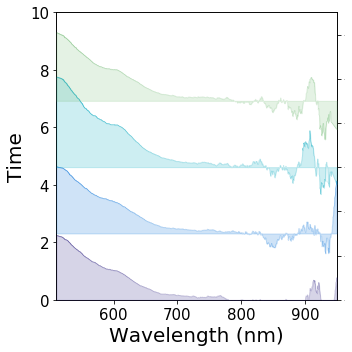

In [396]:
#Plot the raw data
#This factor defines the offset between each spectrum in the graph
mega_fact = 0.3
#This calls the function which adds the offset
data_os = Alex_plot.offset_spectra(PLonAu_n_sm, mega_fact)
#pk_wls_1 = pk_wls_norm
#pk_ints_1 = pk_ints_norm
wls = wl[start_ind:fin_ind]

fig1 = plt.figure(1, figsize = (5,5))#0.2*len(data_os)))
ax1 = fig1.add_subplot(111)
ax1b = ax1.twinx()

colours = parula_map(np.linspace(0,0.8,len(data_os)))
for i in range(0, len(data_os)-1):
    lwidths = (data_os[i] - i*mega_fact)*2
    points = np.array([wls , data_os[i]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis = 1)
    lc_2 = LineCollection(segments, linewidths = lwidths, color = colours[i])
    ax1b.add_collection(lc_2)
    spec1 = np.array(data_os[i], dtype = float)
#     spec2 = np.array(len(all_data_w_time_sorted_offset_n[i])*[i], dtype = float)
    spec2 = np.ones(len(wls))*i*mega_fact
    ax1b.fill_between(wls, spec1, spec2, color = colours[i], 
                alpha = 0.2, zorder = 3)
    #Add in scatter spectra with peak wavelengths
    #ax1b.scatter(pk_wls_1[i], pk_ints_1[i] + i*mega_fact, color = "black", marker = "+" )

    
#ax1.axhline(1, 405, 1000, color = 'r', linewidth = 10)
ax1.set_xlim(start_wl, fin_wl)
ax1.set_xlabel("Wavelength (nm)", fontsize = 20)
ax1.set_ylabel("Time", fontsize = 20)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.set_ylim(0,10)
ax1b.set_ylim(0, (i+3)*mega_fact-0.5)
ax1b.tick_params(axis='y', labelsize=0)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/MAPbI3 perovskite nanoplatelets/2019-03-15/Plot_NP5_PL1_norm.png', bbox_inches='tight')
